# Market Analysis with APRIORI:  Coffee Shop Orders


In [ ]:
!pip install mlxtend
!pip install networkx
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

In [2]:
df = pd.read_csv('data/Coffe Shop Sales.xlsx - MBA_Master.csv')
df.head(10)

,transaction_number,amount,item
0,6,1,Latte Hot
1,6,1,Americano Hot
2,6,1,V60
3,6,1,Brownies
4,7,1,V60
5,7,1,Pain Au Chocolat
6,8,1,V60
7,9,1,Pistachio Croissant
8,9,1,V60
9,9,1,Carrot cake


In [6]:
print(df.item.value_counts().head())
print(df.transaction_number.value_counts().head())
print(df.duplicated().sum())
df[df.duplicated()]

# df.groupby('amount').count()

Latte Iced        1328
Cappucino Hot      649
Latte Hot          523
Americano Iced     468
V60                435
Name: item, dtype: int64
3153    11
1096    10
3093     9
2562     9
2650     9
Name: transaction_number, dtype: int64
534


,transaction_number,amount,item
36,781,1,Flat White Hot
38,781,1,Flat White Hot
46,785,1,V60
49,786,1,Cappucino Hot
60,795,1,Americano Iced
...,...,...,...
6499,5751,1,V60
6513,5770,1,Americano Iced
6536,5785,1,EspressoHot
6539,5788,1,Latte Iced


In [10]:
df[df.amount == df.amount.max()]

,transaction_number,amount,item
6264,5580,6,Plain Croisant


In [11]:
df.groupby('item')['amount'].sum().sort_values(ascending=False).head()

item
Latte Iced        1453
Cappucino Hot      694
Latte Hot          570
Americano Iced     510
V60                446
Name: amount, dtype: int64

In [12]:
df.isnull().sum()


transaction_number    0
amount                0
item                  0
dtype: int64

In [ ]:
df[df.duplicated()]

In [14]:
df.head(9)

,transaction_number,amount,item
0,6,1,Latte Hot
1,6,1,Americano Hot
2,6,1,V60
3,6,1,Brownies
4,7,1,V60
5,7,1,Pain Au Chocolat
6,8,1,V60
7,9,1,Pistachio Croissant
8,9,1,V60


In [13]:
df_pivot = df.pivot_table(
    index='transaction_number',
    columns ='item',
    values = 'amount',
    aggfunc='sum').fillna(0)

print("Dataset size: ", df_pivot.shape)
df_pivot

Dataset size:  (3131, 45)


item,Almond Croisant,Americano Hot,Americano Iced,Apple Turnover,Blueberry Muffins,Brownies,Cake Of The Day,Cappucino Hot,Cappucino Iced,Carrot cake,...,Mochaccino Iced,Pain Au Chocolat,Pain Au Suisse,PiccoloHot,PiccoloIced,Pistachio Croissant,Plain Croisant,Tiramisu,Tiramisu cake,V60
transaction_number,,,,,,,,,,,,,,,,,,,,,
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Show what the top transactions with the highest amounts look like transposed.
df_pivot[df_pivot.select_dtypes(np.number)
                 .apply(lambda x: 4 < x, axis=1)
                 .any(axis=1)] \
        .style \
        .background_gradient(axis=None) \
        .format('{:,.0f}')

c:\Users\yehtu\anaconda3\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
c:\Users\yehtu\anaconda3\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
c:\Users\yehtu\anaconda3\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

item,Almond Croisant,Americano Hot,Americano Iced,Apple Turnover,Blueberry Muffins,Brownies,Cake Of The Day,Cappucino Hot,Cappucino Iced,Carrot cake,Coffee Croissant,Coffee Jelly,Coffee Shakereto,Coffee choux,Cold Brew,Cookies,Decaf Coffee,EspressoHot,EspressoIced,Flat White Hot,Flat White Iced,Kuign-amann,Latte Hot,Latte Iced,LatteHot,LatteIce,Longblack Hot,Longblack Iced,Macchiato 4ozHot,Macchiato Iced,Magic Latte,Matcha cake,Matcha tiramisu,Moca nougat,Mochaccino Hot,Mochaccino Iced,Pain Au Chocolat,Pain Au Suisse,PiccoloHot,PiccoloIced,Pistachio Croissant,Plain Croisant,Tiramisu,Tiramisu cake,V60
transaction_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1096,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1337,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2430,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,2,0,0,0
2620,0,1,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2650,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4708,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0


In [20]:
def encode(x):
    if x <= 0:
        return 0
    else:
        return 1

df_pivot = df_pivot.applymap(encode)
df_pivot.head()

item,Almond Croisant,Americano Hot,Americano Iced,Apple Turnover,Blueberry Muffins,Brownies,Cake Of The Day,Cappucino Hot,Cappucino Iced,Carrot cake,...,Mochaccino Iced,Pain Au Chocolat,Pain Au Suisse,PiccoloHot,PiccoloIced,Pistachio Croissant,Plain Croisant,Tiramisu,Tiramisu cake,V60
transaction_number,,,,,,,,,,,,,,,,,,,,,
6,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# our minimum support
support = 0.01 
frequent_items = apriori(
    df_pivot, 
    min_support=support, 
    use_colnames=True)


frequent_items.sort_values('support', ascending=False)


c:\Users\yehtu\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
14,0.357394,(Latte Iced)
5,0.188758,(Cappucino Hot)
13,0.146279,(Latte Hot)
2,0.136378,(Americano Iced)
24,0.121048,(V60)
...,...,...
38,0.011179,"(V60, Americano Iced)"
51,0.010540,"(Decaf Coffee, Latte Hot)"
34,0.010540,"(Cake Of The Day, Americano Iced)"
54,0.010540,"(Latte Hot, Pain Au Chocolat)"


"Lift" is the ratio of the target reponse given the antecedent relative to no condition. In conditional probability speak this is:
$$
L = \frac{P_{A|B}}{P_B}
$$
High lift suggests that the products tend to purchased together

In [22]:
metric = 'lift'
min_treshold = 1

rules = association_rules(
    frequent_items, 
    metric=metric, 
    min_threshold=min_treshold)


cols_to_keep = ['antecedents','consequents','support','confidence','lift']

rules = rules[cols_to_keep]
rules.reset_index(drop=True).sort_values('confidence',ascending=False, inplace = True)
rules

,antecedents,consequents,support,confidence,lift
0,(Almond Croisant),(Cappucino Iced),0.011498,0.116505,1.021783
1,(Cappucino Iced),(Almond Croisant),0.011498,0.100840,1.021783
2,(Almond Croisant),(Pain Au Chocolat),0.014372,0.145631,2.171290
3,(Pain Au Chocolat),(Almond Croisant),0.014372,0.214286,2.171290
4,(Cappucino Hot),(Americano Hot),0.014692,0.077834,1.154971
5,(Americano Hot),(Cappucino Hot),0.014692,0.218009,1.154971
6,(Latte Hot),(Americano Hot),0.013095,0.089520,1.328370
7,(Americano Hot),(Latte Hot),0.013095,0.194313,1.328370
8,(Cappucino Iced),(Americano Iced),0.015650,0.137255,1.006429
9,(Americano Iced),(Cappucino Iced),0.015650,0.114754,1.006429


In [28]:
# First we build a network from the association rule data

import networkx as nx


### THIS IS TOO CONFUSING FOR KIDS 
from_nodes = [list(x)[0] for x in rules.antecedents]
from_nodes
# from_nodes = rules.antecedents
to_nodes = [list(x)[0] for x in rules.consequents]
# to_nodes = rules.consequents
connections = zip(from_nodes, to_nodes)

connections = []

for from_node, to_node in zip(from_nodes, to_nodes):
    connections.append([from_node, to_node])

G = nx.MultiDiGraph()
G.add_edges_from(connections)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

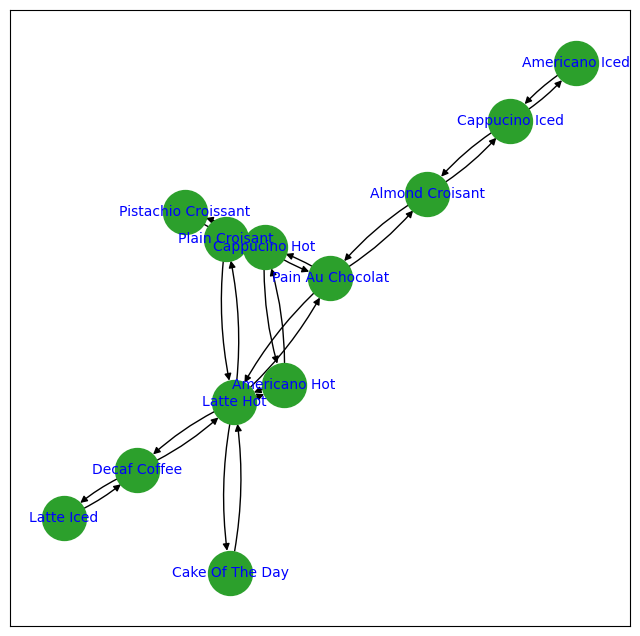

In [29]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(8,8))
nx.draw_networkx(G,
                 arrows=True,
                 node_size=1000,
                 font_size=10, 
                 node_color="tab:green", 
                 font_color='blue', 
                 connectionstyle='arc3, rad=0.1')


Here, we see that the arrows flow both ways.  This shouldn't be suprising since the data contains purchases that happen at the same time.  

In [30]:
rules.head()

,antecedents,consequents,support,confidence,lift
0,(Almond Croisant),(Cappucino Iced),0.011498,0.116505,1.021783
1,(Cappucino Iced),(Almond Croisant),0.011498,0.100840,1.021783
2,(Almond Croisant),(Pain Au Chocolat),0.014372,0.145631,2.171290
3,(Pain Au Chocolat),(Almond Croisant),0.014372,0.214286,2.171290
4,(Cappucino Hot),(Americano Hot),0.014692,0.077834,1.154971


In [31]:
rules_even = rules.iloc[::2, :].copy() #  keep only even rows

rules_even.antecedents= [list(x)[0] for x in rules_even.antecedents]  # get rid of frozensets
rules_even.consequents= [list(x)[0] for x in rules_even.consequents]  # get rid of frozensets


rules_even['connections'] = rules_even['antecedents']+'<->'+rules_even['consequents']
rules_even= rules_even.sort_values('lift', ascending = False)
rules_even

,antecedents,consequents,support,confidence,lift,connections
2,Almond Croisant,Pain Au Chocolat,0.014372,0.145631,2.171290,Almond Croisant<->Pain Au Chocolat
18,Decaf Coffee,Latte Hot,0.010540,0.266129,1.819323,Decaf Coffee<->Latte Hot
16,Cappucino Hot,Plain Croisant,0.015969,0.084602,1.408989,Cappucino Hot<->Plain Croisant
24,Latte Hot,Plain Croisant,0.011817,0.080786,1.345431,Latte Hot<->Plain Croisant
20,Latte Iced,Decaf Coffee,0.018844,0.052726,1.331323,Latte Iced<->Decaf Coffee
6,Latte Hot,Americano Hot,0.013095,0.089520,1.328370,Latte Hot<->Americano Hot
12,Cappucino Hot,Pain Au Chocolat,0.014692,0.077834,1.160471,Cappucino Hot<->Pain Au Chocolat
4,Cappucino Hot,Americano Hot,0.014692,0.077834,1.154971,Cappucino Hot<->Americano Hot
14,Cappucino Hot,Pistachio Croissant,0.011179,0.059222,1.090724,Cappucino Hot<->Pistachio Croissant
22,Latte Hot,Pain Au Chocolat,0.010540,0.072052,1.074267,Latte Hot<->Pain Au Chocolat


Text(0.5, 1.0, 'Coffee Shop Product Lift')

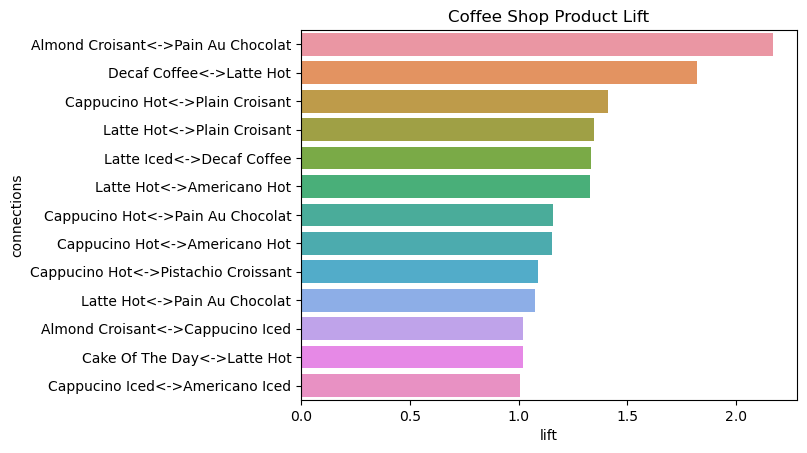

In [32]:
import seaborn as sns
sns.barplot(rules_even, y="connections", x="lift").set_title('Coffee Shop Product Lift')

Apparently, the sweet tooth wins out!  